In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student_habits_performance.csv')

In [7]:
df.head(3)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [8]:
cols = ['study_hours_per_day','social_media_hours', 'netflix_hours','attendance_percentage', 'sleep_hours', 
'exercise_frequency', 'mental_health_rating', 'exam_score']

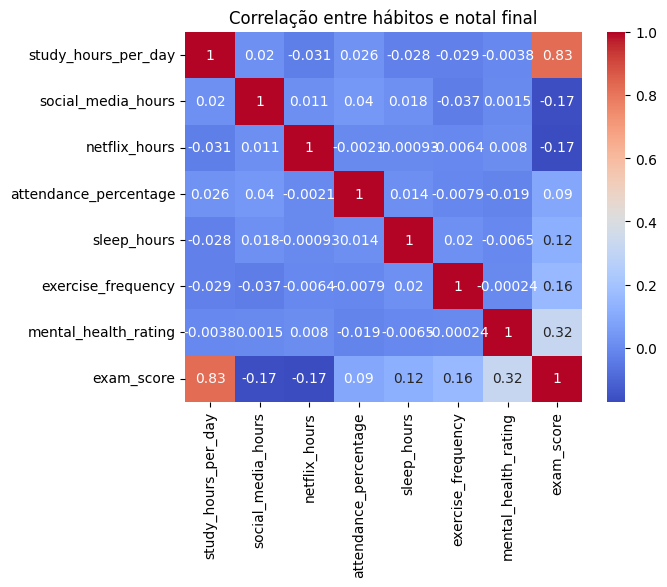

In [11]:
sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlação entre hábitos e notal final")
plt.show()

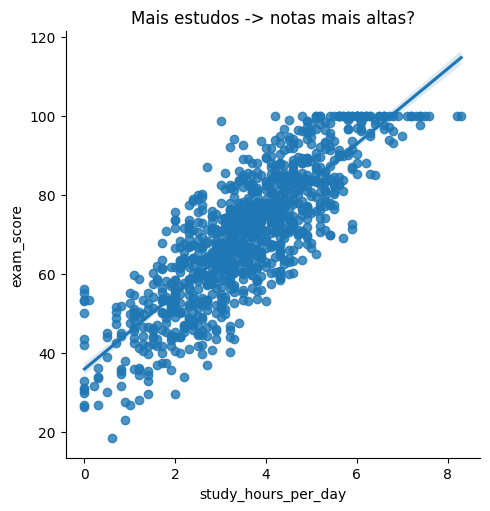

In [12]:
sns.lmplot(data=df, x="study_hours_per_day", y="exam_score")
plt.title("Mais estudos -> notas mais altas?")
plt.show()

In [21]:
filtro_estudo_alto = df['study_hours_per_day'] > 5
filtro_estudo_baixo = df['study_hours_per_day'] < 2

grupo_estudo_alto = df[filtro_estudo_alto]['exam_score']
grupo_estudo_baixo = df[filtro_estudo_baixo]['exam_score']

print(f"Mais que 5 = {round(grupo_estudo_alto.mean())}")
print(f"Menos que 2 = {round(grupo_estudo_baixo.mean())}")

Mais que 5 = 91
Menos que 2 = 46


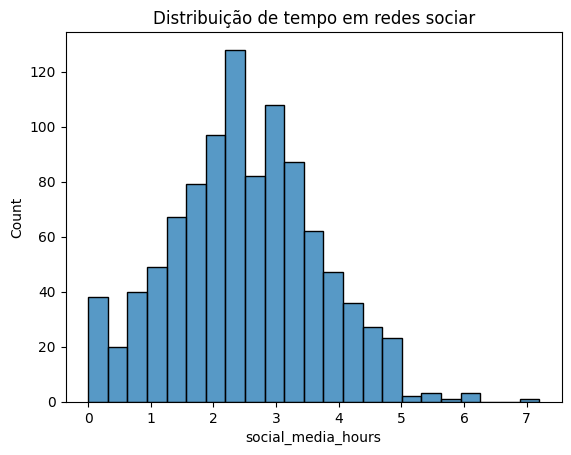

In [25]:
sns.histplot(data=df, x="social_media_hours")
plt.title("Distribuição de tempo em redes sociar")
plt.show()

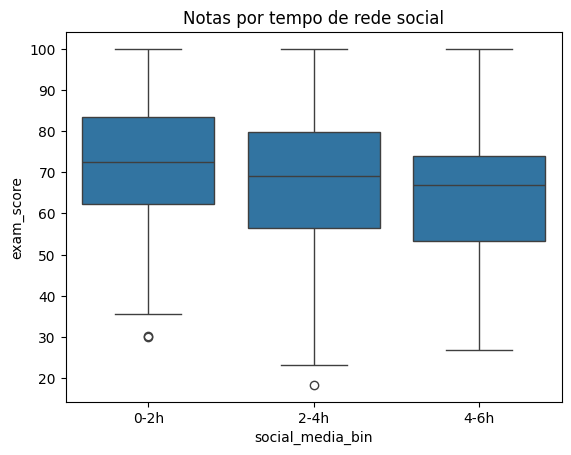

In [28]:
df['social_media_bin'] = pd.cut(df['social_media_hours'], bins=[0,2,4,6], labels=["0-2h","2-4h","4-6h"])

sns.boxplot(x="social_media_bin", y="exam_score", data=df)
plt.title("Notas por tempo de rede social")
plt.show()

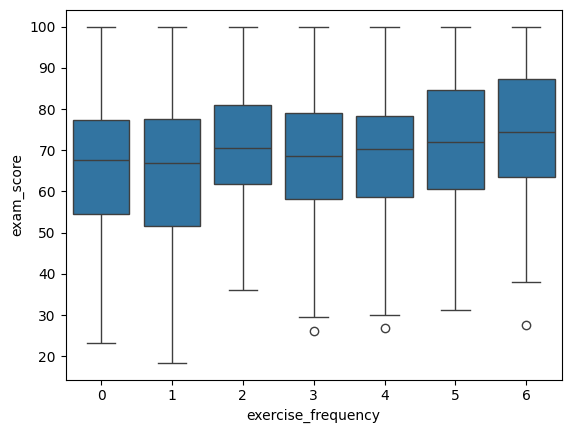

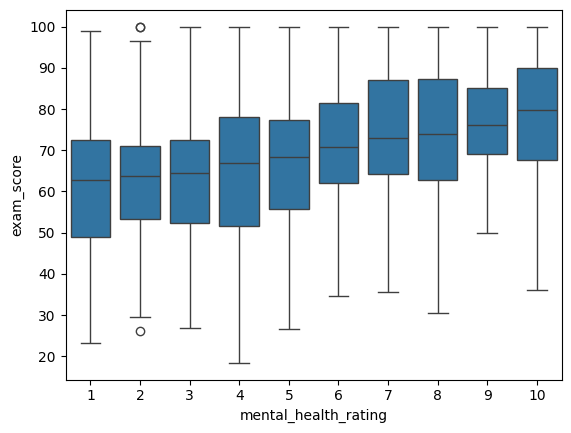

In [32]:
for col in ['exercise_frequency', 'mental_health_rating']:
    sns.boxplot(data=df, x=col, y="exam_score")
    plt.show()